In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from itertools import permutations
!pip install mlxtend
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
from pandas.plotting import parallel_coordinates


In [2]:
df = pd.read_csv('OnlineRetail_Clean.csv')
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice_Date,Hour,DayofWeek,MonthFirstDay,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,2010-12-01,8,Wednesday,2010-12-01,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01,8,Wednesday,2010-12-01,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,2010-12-01,8,Wednesday,2010-12-01,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01,8,Wednesday,2010-12-01,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01,8,Wednesday,2010-12-01,20.34
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom,2010-12-01,8,Wednesday,2010-12-01,15.30
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom,2010-12-01,8,Wednesday,2010-12-01,25.50
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom,2010-12-01,8,Wednesday,2010-12-01,11.10
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom,2010-12-01,8,Wednesday,2010-12-01,11.10
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom,2010-12-01,8,Wednesday,2010-12-01,54.08


## Selecting the Top 100 Best-Selling Items

In [3]:
df['Description'] = df['Description'].str.strip(' . \n\t')

In [4]:
df_items = df.groupby('Description').Quantity.sum()
df_items

Description
*Boombox Ipod Classic                  1
*USB Office Mirror Ball                2
10 COLOUR SPACEBOY PEN              6276
12 COLOURED PARTY BALLOONS          2134
12 DAISY PEGS IN WOOD BOX            344
                                    ... 
ZINC T-LIGHT HOLDER STARS SMALL     5089
ZINC TOP  2 DOOR WOODEN SHELF         13
ZINC WILLIE WINKIE  CANDLE STICK    2933
ZINC WIRE KITCHEN ORGANISER           30
ZINC WIRE SWEETHEART LETTER TRAY      83
Name: Quantity, Length: 4003, dtype: int64

In [5]:
# Sort items based on TotalPrice and get the index
items = df_items.sort_values(ascending=False).index
items

Index(['JUMBO BAG RED RETROSPOT', 'ASSORTED COLOUR BIRD ORNAMENT',
       'PACK OF 72 RETROSPOT CAKE CASES', 'WHITE HANGING HEART T-LIGHT HOLDER',
       'WORLD WAR 2 GLIDERS ASSTD DESIGNS', 'VICTORIAN GLASS HANGING T-LIGHT',
       'POPCORN HOLDER', 'LUNCH BAG RED RETROSPOT', 'RABBIT NIGHT LIGHT',
       'JUMBO BAG PINK POLKADOT',
       ...
       'SET/4 2 TONE EGG SHAPE MIXING BOWLS', 'KEEP OUT GIRLS DOOR HANGER',
       'JARDIN ETCHED GLASS BUTTER DISH', 'SET/6 IVORY BIRD T-LIGHT CANDLES',
       'I LOVE LONDON MINI RUCKSACK', 'WIRE FLOWER T-LIGHT HOLDER',
       'HEN HOUSE W CHICK IN NEST', 'CAKE STAND LACE WHITE',
       'GREEN PENDANT SHELL NECKLACE', '*Boombox Ipod Classic'],
      dtype='object', name='Description', length=4003)

In [6]:
# Extract the first 100 items
item_list = items.tolist()[0:100]
item_list

['JUMBO BAG RED RETROSPOT',
 'ASSORTED COLOUR BIRD ORNAMENT',
 'PACK OF 72 RETROSPOT CAKE CASES',
 'WHITE HANGING HEART T-LIGHT HOLDER',
 'WORLD WAR 2 GLIDERS ASSTD DESIGNS',
 'VICTORIAN GLASS HANGING T-LIGHT',
 'POPCORN HOLDER',
 'LUNCH BAG RED RETROSPOT',
 'RABBIT NIGHT LIGHT',
 'JUMBO BAG PINK POLKADOT',
 'PARTY BUNTING',
 'CHARLOTTE BAG SUKI DESIGN',
 'RED RETROSPOT CHARLOTTE BAG',
 "PAPER CHAIN KIT 50'S CHRISTMAS",
 'COLOUR GLASS T-LIGHT HOLDER HANGING',
 'PACK OF 60 PINK PAISLEY CAKE CASES',
 '60 TEATIME FAIRY CAKE CASES',
 'JAM MAKING SET PRINTED',
 'JUMBO BAG STRAWBERRY',
 'MINI PAINT SET VINTAGE',
 'ANTIQUE SILVER T-LIGHT GLASS',
 'JUMBO STORAGE BAG SUKI',
 'REGENCY CAKESTAND 3 TIER',
 '60 CAKE CASES VINTAGE CHRISTMAS',
 'JUMBO BAG APPLES',
 'JUMBO  BAG BAROQUE BLACK WHITE',
 'SET/20 RED RETROSPOT PAPER NAPKINS',
 'WOODLAND CHARLOTTE BAG',
 'HEART OF WICKER SMALL',
 'SET OF 4 PANTRY JELLY MOULDS',
 'JUMBO SHOPPER VINTAGE RED PAISLEY',
 'JUMBO BAG ALPHABET',
 'HANGING HEART JAR

We now have a list of top 100 items

In [7]:
# Get df containing the top 100 items
df_items = df[df['Description'].isin(item_list)]
df_items

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice_Date,Hour,DayofWeek,MonthFirstDay,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,2010-12-01,8,Wednesday,2010-12-01,15.30
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom,2010-12-01,8,Wednesday,2010-12-01,54.08
21,536368,22960,JAM MAKING SET WITH JARS,6,12/1/2010 8:34,4.25,13047.0,United Kingdom,2010-12-01,8,Wednesday,2010-12-01,25.50
34,536370,22326,ROUND SNACK BOXES SET OF4 WOODLAND,24,12/1/2010 8:45,2.95,12583.0,France,2010-12-01,8,Wednesday,2010-12-01,70.80
35,536370,22629,SPACEBOY LUNCH BOX,24,12/1/2010 8:45,1.95,12583.0,France,2010-12-01,8,Wednesday,2010-12-01,46.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...
522548,581585,23084,RABBIT NIGHT LIGHT,12,12/9/2011 12:31,2.08,15804.0,United Kingdom,2011-12-09,12,Friday,2011-12-01,24.96
522549,581585,84879,ASSORTED COLOUR BIRD ORNAMENT,16,12/9/2011 12:31,1.69,15804.0,United Kingdom,2011-12-09,12,Friday,2011-12-01,27.04
522550,581585,84945,MULTI COLOUR SILVER T-LIGHT HOLDER,24,12/9/2011 12:31,0.85,15804.0,United Kingdom,2011-12-09,12,Friday,2011-12-01,20.40
522558,581585,84946,ANTIQUE SILVER T-LIGHT GLASS,12,12/9/2011 12:31,1.25,15804.0,United Kingdom,2011-12-09,12,Friday,2011-12-01,15.00


In [8]:
df_items = df_items[['InvoiceNo','Description']]

In [9]:
# Group the items based on InvoiceNo
df_new = df_items.groupby('InvoiceNo').Description.apply(','.join).reset_index()
df_new

,InvoiceNo,Description
0,536365,WHITE HANGING HEART T-LIGHT HOLDER
1,536367,ASSORTED COLOUR BIRD ORNAMENT
2,536368,JAM MAKING SET WITH JARS
3,536370,"ROUND SNACK BOXES SET OF4 WOODLAND,SPACEBOY LU..."
4,536371,PAPER CHAIN KIT 50'S CHRISTMAS
...,...,...
15287,581579,"JUMBO BAG PINK POLKADOT,JUMBO SHOPPER VINTAGE ..."
15288,581580,"VINTAGE SNAP CARDS,CHILLI LIGHTS"
15289,581583,LUNCH BAG RED RETROSPOT
15290,581585,"VICTORIAN GLASS HANGING T-LIGHT,RABBIT NIGHT L..."


In [10]:
# Split strings into lists
transaction = df_new['Description'].apply(lambda t:t.split(','))

In [11]:
# Turn the lists into a list of lists 
transaction = list(transaction)

In [12]:
# Show the first 10 sublists
transaction[0:10]

[['WHITE HANGING HEART T-LIGHT HOLDER'],
 ['ASSORTED COLOUR BIRD ORNAMENT'],
 ['JAM MAKING SET WITH JARS'],
 ['ROUND SNACK BOXES SET OF4 WOODLAND',
  'SPACEBOY LUNCH BOX',
  'LUNCH BOX I LOVE LONDON',
  'RED TOADSTOOL LED NIGHT LIGHT',
  'MINI PAINT SET VINTAGE'],
 ["PAPER CHAIN KIT 50'S CHRISTMAS"],
 ['WHITE HANGING HEART T-LIGHT HOLDER', 'WOODEN PICTURE FRAME WHITE FINISH'],
 ['WHITE HANGING HEART T-LIGHT HOLDER', 'WOODEN PICTURE FRAME WHITE FINISH'],
 ['JUMBO BAG PINK POLKADOT',
  'JUMBO  BAG BAROQUE BLACK WHITE',
  'STRAWBERRY CHARLOTTE BAG',
  'SET/6 RED SPOTTY PAPER PLATES',
  'LUNCH BAG RED RETROSPOT',
  'PACK OF 72 RETROSPOT CAKE CASES',
  'PACK OF 60 DINOSAUR CAKE CASES',
  'PACK OF 60 PINK PAISLEY CAKE CASES',
  '60 TEATIME FAIRY CAKE CASES',
  'JUMBO STORAGE BAG SUKI',
  'JUMBO BAG PINK VINTAGE PAISLEY'],
 ['JAM MAKING SET PRINTED'],
 ['JUMBO SHOPPER VINTAGE RED PAISLEY',
  'COOK WITH WINE METAL SIGN',
  'GIN + TONIC DIET METAL SIGN',
  "PAPER CHAIN KIT 50'S CHRISTMAS",
  'R

## Applying Apriori Algorithm and Association Rules

In [13]:
# Generate number of possible rules with itertools
list_rules= list(permutations(item_list, 2))
len(list_rules)

9900

In [14]:
# One hot encode the data
encoder = TransactionEncoder().fit(transaction)
onehot = encoder.transform(transaction)
onehot = pd.DataFrame(onehot, columns=encoder.columns_)

In [15]:
onehot

,6 RIBBONS RUSTIC CHARM,60 CAKE CASES VINTAGE CHRISTMAS,60 TEATIME FAIRY CAKE CASES,72 SWEETHEART FAIRY CAKE CASES,AGED GLASS SILVER T-LIGHT HOLDER,ANTIQUE SILVER T-LIGHT GLASS,ASSORTED COLOUR BIRD ORNAMENT,ASSORTED COLOURS SILK FAN,BLUE HARMONICA IN BOX,BROCADE RING PURSE,...,T-LIGHT GLASS FLUTED ANTIQUE,TRAVEL CARD WALLET KEEP CALM,VICTORIAN GLASS HANGING T-LIGHT,VINTAGE SNAP CARDS,WHITE HANGING HEART T-LIGHT HOLDER,WOODEN HEART CHRISTMAS SCANDINAVIAN,WOODEN PICTURE FRAME WHITE FINISH,WOODEN STAR CHRISTMAS SCANDINAVIAN,WOODLAND CHARLOTTE BAG,WORLD WAR 2 GLIDERS ASSTD DESIGNS
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15287,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
15288,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
15289,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
15290,False,False,False,False,False,True,True,False,False,False,...,False,False,True,False,False,False,False,False,False,False


In [16]:
# Compute support
onehot.mean()

6 RIBBONS RUSTIC CHARM                 0.062386
60 CAKE CASES VINTAGE CHRISTMAS        0.040021
60 TEATIME FAIRY CAKE CASES            0.053754
72 SWEETHEART FAIRY CAKE CASES         0.039890
AGED GLASS SILVER T-LIGHT HOLDER       0.022038
                                         ...   
WOODEN HEART CHRISTMAS SCANDINAVIAN    0.035182
WOODEN PICTURE FRAME WHITE FINISH      0.071868
WOODEN STAR CHRISTMAS SCANDINAVIAN     0.033351
WOODLAND CHARLOTTE BAG                 0.054408
WORLD WAR 2 GLIDERS ASSTD DESIGNS      0.032631
Length: 100, dtype: float64

In [17]:
# Apply apriori
freq_items = apriori(onehot, min_support=0.01, use_colnames=True, max_len=2)
freq_items

,support,itemsets
0,0.062386,(6 RIBBONS RUSTIC CHARM)
1,0.040021,(60 CAKE CASES VINTAGE CHRISTMAS)
2,0.053754,(60 TEATIME FAIRY CAKE CASES)
3,0.039890,(72 SWEETHEART FAIRY CAKE CASES)
4,0.022038,(AGED GLASS SILVER T-LIGHT HOLDER)
...,...,...
937,0.011640,"(VICTORIAN GLASS HANGING T-LIGHT, WOODEN PICTU..."
938,0.013994,"(WHITE HANGING HEART T-LIGHT HOLDER, VINTAGE S..."
939,0.026681,"(WHITE HANGING HEART T-LIGHT HOLDER, WOODEN PI..."
940,0.012621,"(WOODLAND CHARLOTTE BAG, WHITE HANGING HEART T..."


In [18]:
# Apply association rules
rules = association_rules(freq_items, metric='support', min_threshold=0.01)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(HEART OF WICKER SMALL),(6 RIBBONS RUSTIC CHARM),0.078015,0.062386,0.011313,0.145013,2.324457,0.006446,1.096641
1,(6 RIBBONS RUSTIC CHARM),(HEART OF WICKER SMALL),0.062386,0.078015,0.011313,0.181342,2.324457,0.006446,1.126215
2,(6 RIBBONS RUSTIC CHARM),(JAM MAKING SET PRINTED),0.062386,0.075726,0.015433,0.247379,3.266776,0.010709,1.228075
3,(JAM MAKING SET PRINTED),(6 RIBBONS RUSTIC CHARM),0.075726,0.062386,0.015433,0.203800,3.266776,0.010709,1.177611
4,(JAM MAKING SET WITH JARS),(6 RIBBONS RUSTIC CHARM),0.074026,0.062386,0.013471,0.181979,2.917002,0.008853,1.146198
...,...,...,...,...,...,...,...,...,...
1679,(WOODEN PICTURE FRAME WHITE FINISH),(WHITE HANGING HEART T-LIGHT HOLDER),0.071868,0.146613,0.026681,0.371247,2.532160,0.016144,1.357269
1680,(WOODLAND CHARLOTTE BAG),(WHITE HANGING HEART T-LIGHT HOLDER),0.054408,0.146613,0.012621,0.231971,1.582205,0.004644,1.111140
1681,(WHITE HANGING HEART T-LIGHT HOLDER),(WOODLAND CHARLOTTE BAG),0.146613,0.054408,0.012621,0.086084,1.582205,0.004644,1.034660
1682,(WOODEN HEART CHRISTMAS SCANDINAVIAN),(WOODEN STAR CHRISTMAS SCANDINAVIAN),0.035182,0.033351,0.025373,0.721190,21.624375,0.024199,3.467049


## Visualizing Rules

### Scatterplot: Visualize Entire Dataset

<AxesSubplot:xlabel='antecedent support', ylabel='consequent support'>

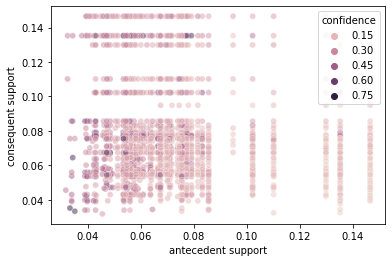

In [19]:
sns.scatterplot(x='antecedent support', y='consequent support', hue='confidence', data=rules, alpha=0.5)

<AxesSubplot:xlabel='antecedent support', ylabel='consequent support'>

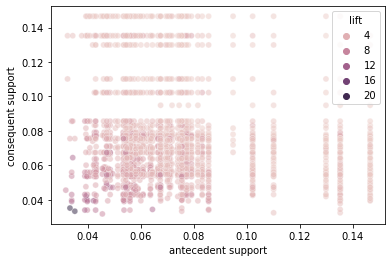

In [20]:
sns.scatterplot(x='antecedent support', y='consequent support', hue='lift', data=rules, alpha=0.5)

We can see that the biggest dots are clustered around very low antecedent and consequent support values. Such results could be generated by a small number of users, which suggests that the high lift values might not be as informative as we would normally expect. To the contrary, this plot should convince us to treat very high values of lift with skepticism.

### Filter the Rules

In [21]:
# Convert frozensets to strings
rules['antecedents']=rules['antecedents'].apply(lambda x:list(x)[0])
rules['consequents']=rules['consequents'].apply(lambda x:list(x)[0])

# Set the name of each rule to its index value
rules['rules']=rules.index

In [26]:
# Select rules with lift > 11
filtered_rules = rules[(rules['antecedent support']>0.08) & (rules['consequent support']>0.08) & (rules['confidence']>0.2) & (rules['lift']>2)]
print(filtered_rules)
len(filtered_rules)

                  antecedents              consequents  antecedent support  \
1136   LUNCH BAG  BLACK SKULL  LUNCH BAG RED RETROSPOT            0.083246   
1137  LUNCH BAG RED RETROSPOT   LUNCH BAG  BLACK SKULL            0.102276   

      consequent support   support  confidence     lift  leverage  conviction  \
1136            0.102276  0.041917    0.503535  4.92331  0.033403    1.808233   
1137            0.083246  0.041917    0.409847  4.92331  0.033403    1.553416   

      rules  
1136   1136  
1137   1137  


2

In [23]:
coords = filtered_rules[['antecedents','consequents', 'rules']]
coords

,antecedents,consequents,rules
840,LUNCH BAG BLACK SKULL,JUMBO BAG RED RETROSPOT,840
848,JUMBO BAG RED RETROSPOT,LUNCH BAG RED RETROSPOT,848
849,LUNCH BAG RED RETROSPOT,JUMBO BAG RED RETROSPOT,849
1136,LUNCH BAG BLACK SKULL,LUNCH BAG RED RETROSPOT,1136
1137,LUNCH BAG RED RETROSPOT,LUNCH BAG BLACK SKULL,1137
1146,LUNCH BAG BLACK SKULL,PACK OF 72 RETROSPOT CAKE CASES,1146
1147,PACK OF 72 RETROSPOT CAKE CASES,LUNCH BAG BLACK SKULL,1147
1270,PACK OF 72 RETROSPOT CAKE CASES,LUNCH BAG RED RETROSPOT,1270
1271,LUNCH BAG RED RETROSPOT,PACK OF 72 RETROSPOT CAKE CASES,1271
1404,NATURAL SLATE HEART CHALKBOARD,WHITE HANGING HEART T-LIGHT HOLDER,1404


### Parallel Coordinates Plot: Examine Final Rules

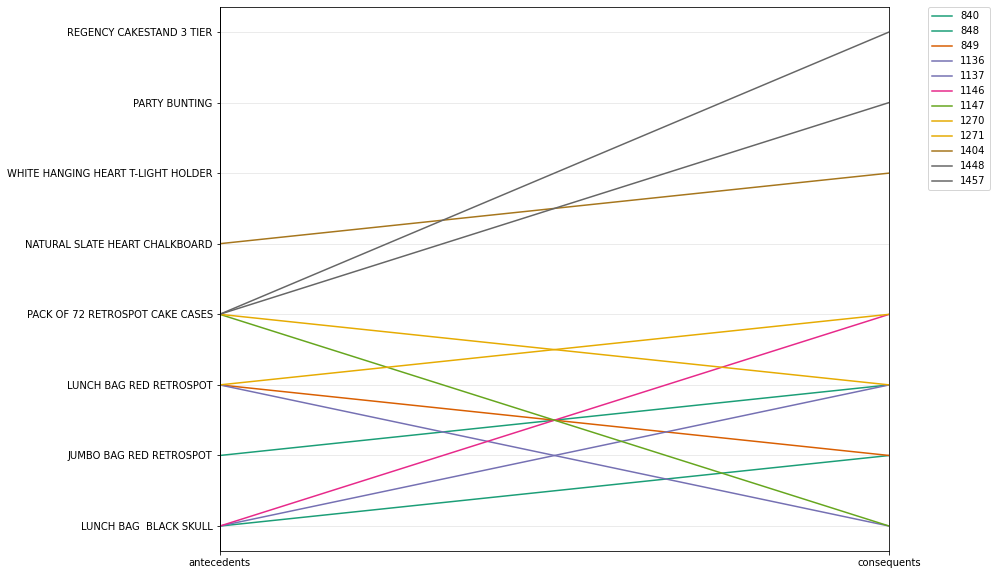

In [24]:
plt.figure(figsize = (12,10))
parallel_coordinates(coords, 'rules', colormap='Dark2')
plt.legend(bbox_to_anchor=(1.15, 1), borderaxespad=0.)
plt.grid(b=True, alpha=0.3)